In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')

df=pd.read_csv('yahoo_stock.csv')

In [2]:
from keras.optimizers import Adam
import statistics

In [3]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [4]:
df.shape

(1825, 7)

In [5]:
len(df['Date'].unique())

1825

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [7]:
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [8]:
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
df.Date=pd.to_datetime(df['Date'])

In [10]:
df.Date.min(),df.Date.max()

(Timestamp('2015-11-23 00:00:00'), Timestamp('2020-11-20 00:00:00'))

In [11]:
df.Date.max()-df.Date.min()

Timedelta('1824 days 00:00:00')

In [12]:
df.set_index('Date',inplace=True)

In [13]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


<Axes: xlabel='Date'>

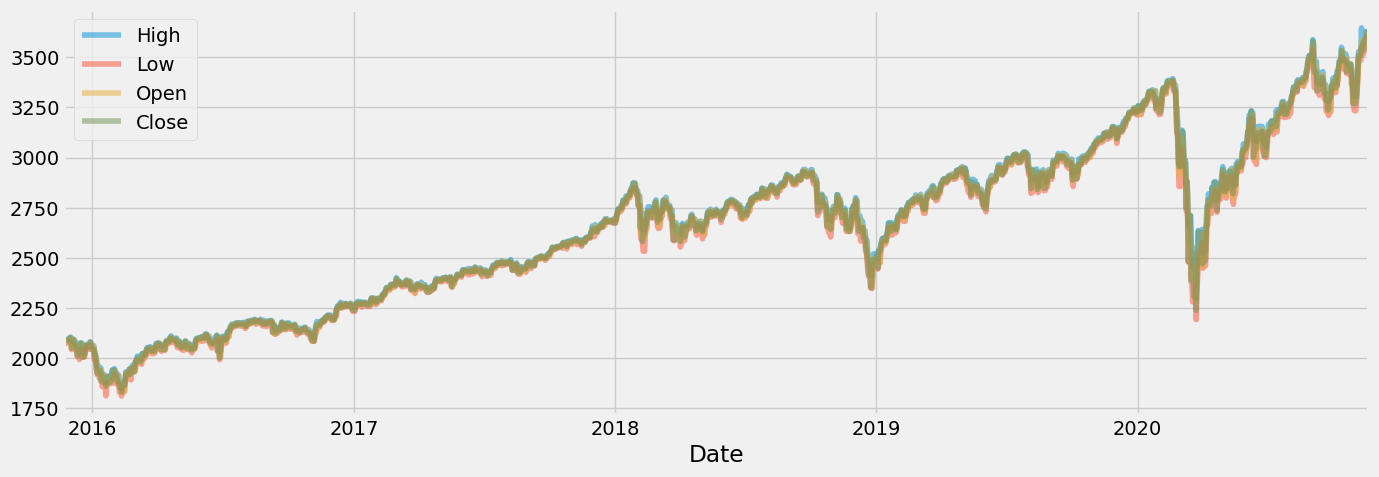

In [14]:
df[['High','Low','Open','Close']].plot(figsize = (15, 5), alpha = 0.5)

<Axes: >

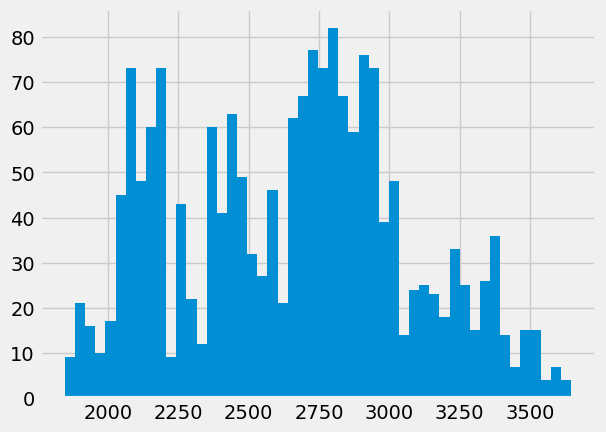

In [15]:
df.High.hist(bins=50)

In [16]:
np.round(df.shape[0]/10,0)

182.0

In [17]:
from statistics import stdev
mean=[]
std=[]

for i in range(0,10):
    mean.append(df['High'].iloc[(i*182):(i*182)+182].mean())
    std.append(stdev(df['High'].iloc[(i*182):(i*182)+182]))

In [18]:
pd.concat([pd.DataFrame(mean,columns=['mean']),pd.DataFrame(std,columns=['std'])], axis=1)

,mean,std
0,2019.354300,71.041024
1,2147.740282,36.287599
2,2322.969570,60.228422
3,2489.706581,55.878102
4,2711.253743,63.125935
5,2816.088946,68.351685
6,2754.165647,131.792411
7,2965.153137,74.059325
8,3045.669328,267.695412
9,3309.076588,165.733813


In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

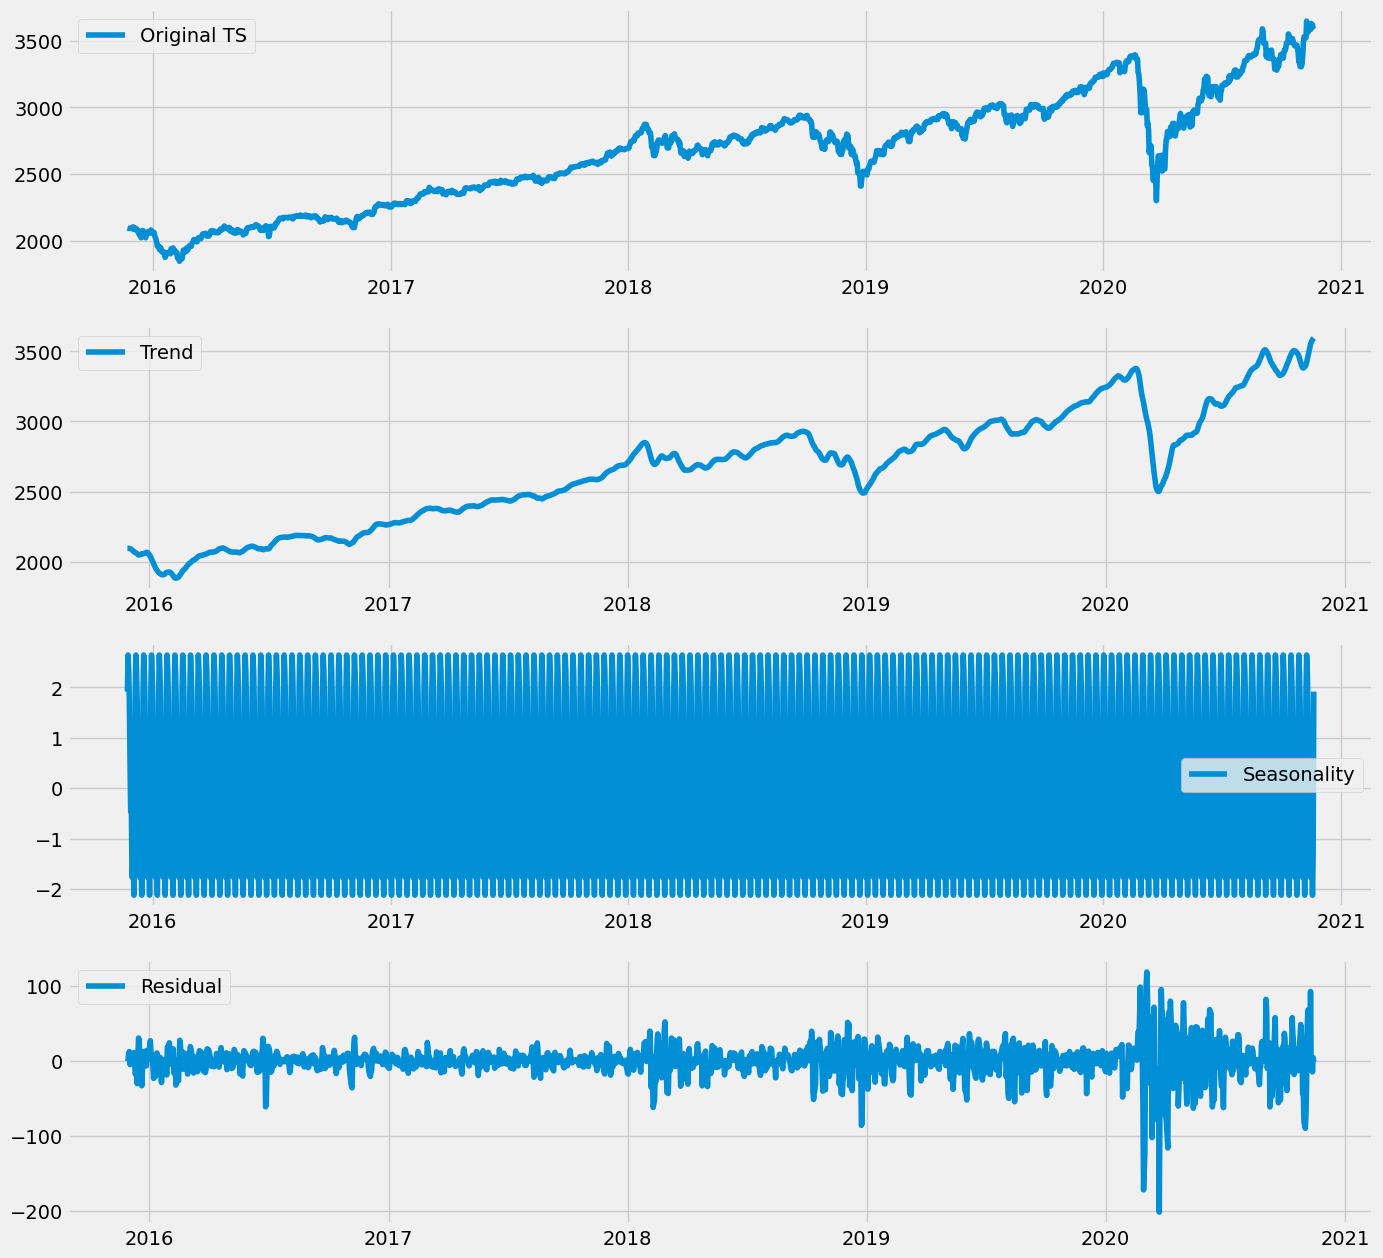

In [20]:
decompose_add=seasonal_decompose(df['High'], model='additive', period=12)
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(df['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add.resid, label='Residual')
plt.legend(loc='best')

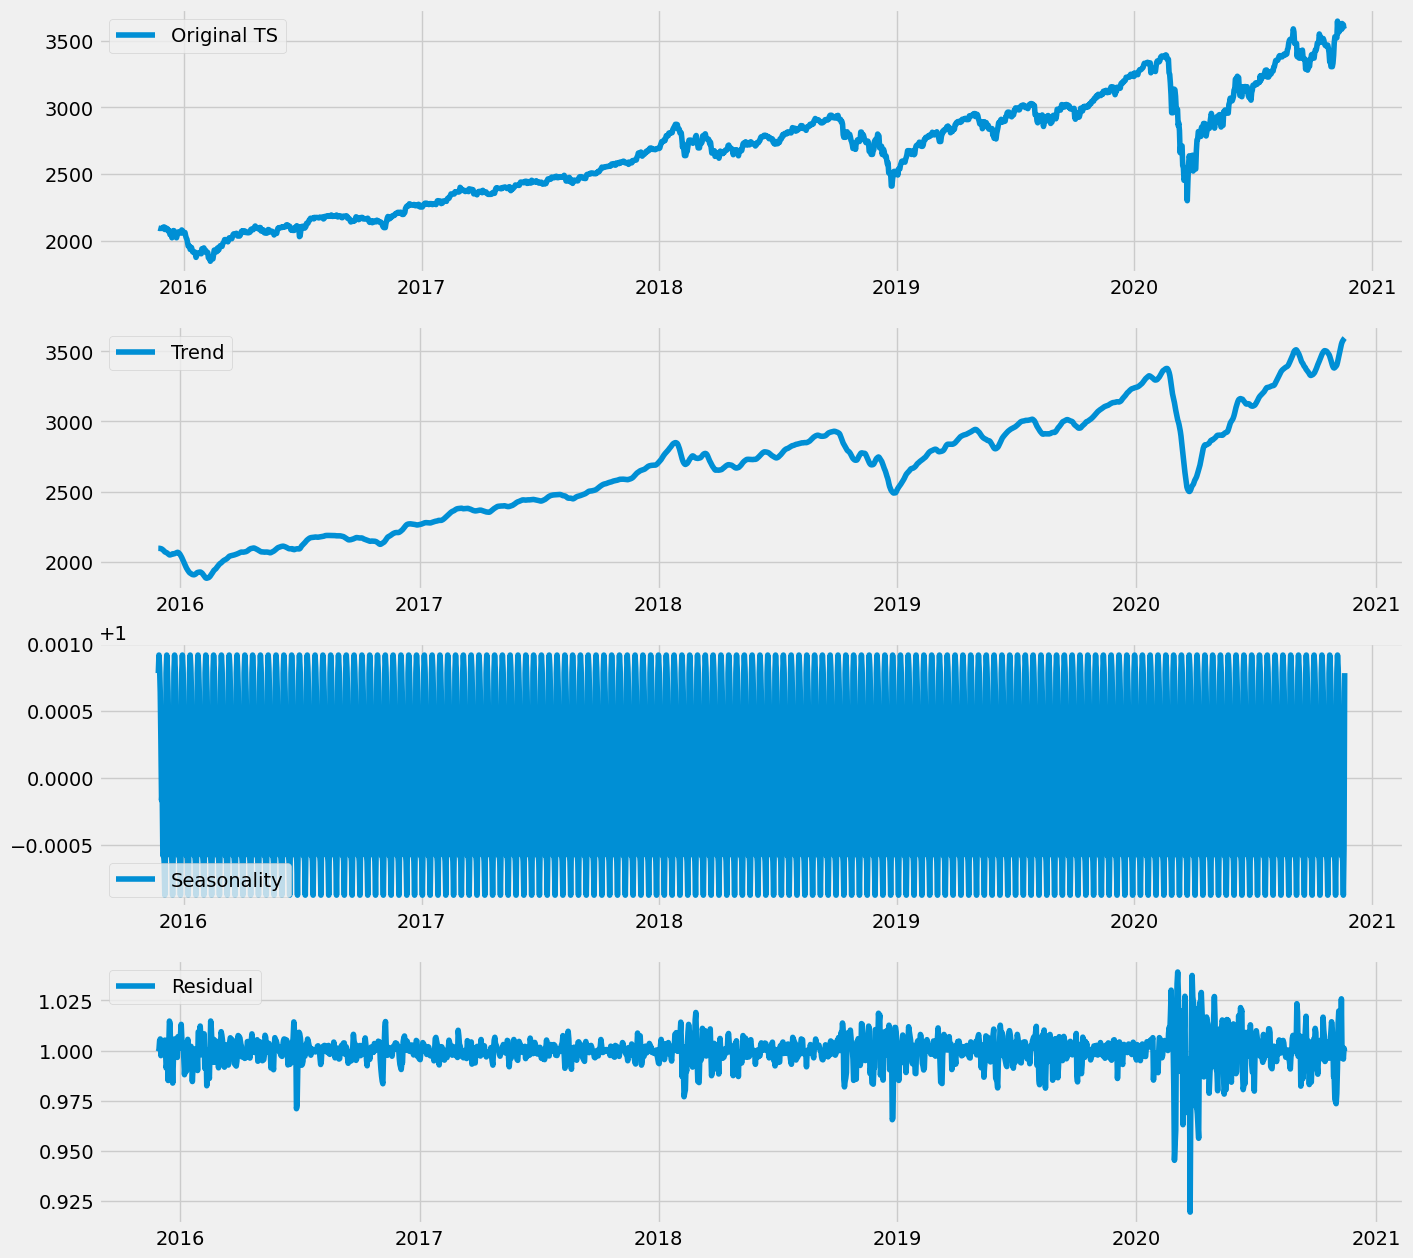

In [21]:
decompose_mul=seasonal_decompose(df['High'], model='multiplicative', period=12)
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(df['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_mul.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_mul.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_mul.resid, label='Residual')
plt.legend(loc='best')

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

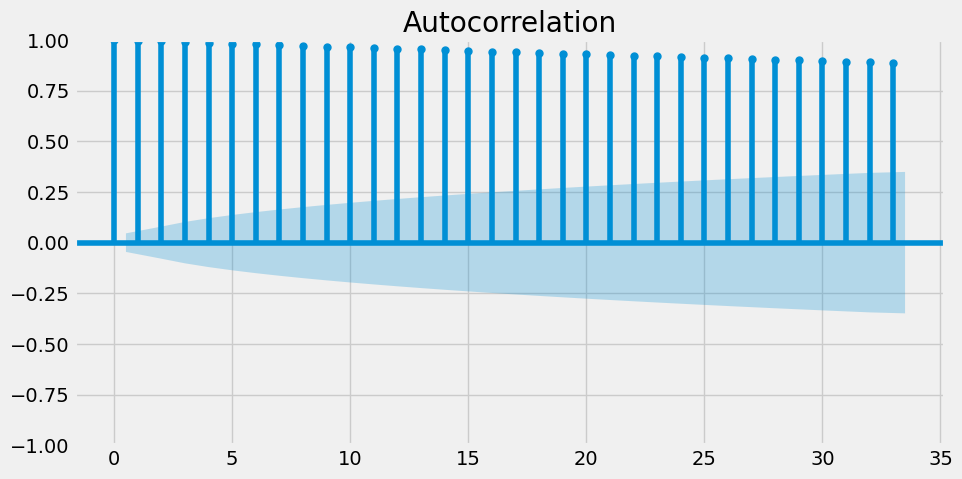

In [23]:
plt.rc("figure", figsize=(10,5))
plot_acf(df['High'])
print()

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
result = adfuller(df['High'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.713598
p-value: 0.843196
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [26]:
from numpy import log

result = adfuller(log(df['High']))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.920468
p-value: 0.781157
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [27]:
new_df=df['High'].iloc[:-4]

In [28]:
train_len = math.ceil(len(new_df)*0.8)
train_len

1457

In [29]:
window=10

In [30]:
train_data = new_df[0:train_len]

X_train=[]
Y_train=[]

for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

In [31]:
X_train, Y_train= np.array(X_train), np.array(Y_train)

In [32]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1447, 10, 1)

In [33]:
X_train

array([[[2095.61010742],
        [2094.12011719],
        [2093.        ],
        ...,
        [2093.81005859],
        [2103.37011719],
        [2104.27001953]],

       [[2094.12011719],
        [2093.        ],
        [2093.        ],
        ...,
        [2103.37011719],
        [2104.27001953],
        [2085.        ]],

       [[2093.        ],
        [2093.        ],
        [2093.29003906],
        ...,
        [2104.27001953],
        [2085.        ],
        [2093.84008789]],

       ...,

       [[3078.34008789],
        [3097.77001953],
        [3093.09008789],
        ...,
        [3098.06005859],
        [3098.19995117],
        [3120.45996094]],

       [[3097.77001953],
        [3093.09008789],
        [3093.09008789],
        ...,
        [3098.19995117],
        [3120.45996094],
        [3120.45996094]],

       [[3093.09008789],
        [3093.09008789],
        [3093.09008789],
        ...,
        [3120.45996094],
        [3120.45996094],
        [3120.45996094]]

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [35]:
model=Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11701 (45.71 KB)
Trainable params: 11701 (45.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
test_data = new_df[train_len-window:]

X_val=[]
Y_val=[]

for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])

In [37]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [38]:
X_val.shape, Y_val.shape

((364, 10, 1), (364,))

In [39]:
prediction = model.predict(X_val)

12/12 [==============================] - 0s 3ms/step


In [40]:
len(prediction), len(Y_val)

(364, 364)

In [41]:
from sklearn.metrics import mean_squared_error

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

12/12 [==============================] - 0s 4ms/step
Train rmse: 29.948001485248533
Validation rmse: 100.72372908863107


In [42]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,High,Predictions
Date,,
2019-11-19,3127.639893,3111.615723
2019-11-20,3118.969971,3114.913574
2019-11-21,3110.110107,3117.485352
2019-11-22,3112.870117,3119.707520
2019-11-23,3112.870117,3121.349609
...,...,...
2020-11-12,3569.020020,3511.619141
2020-11-13,3593.659912,3537.616211
2020-11-14,3593.659912,3557.690918


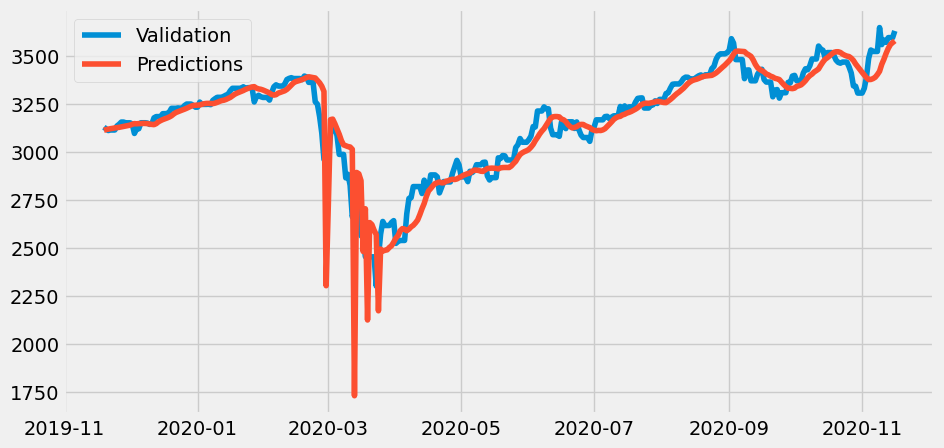

In [43]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

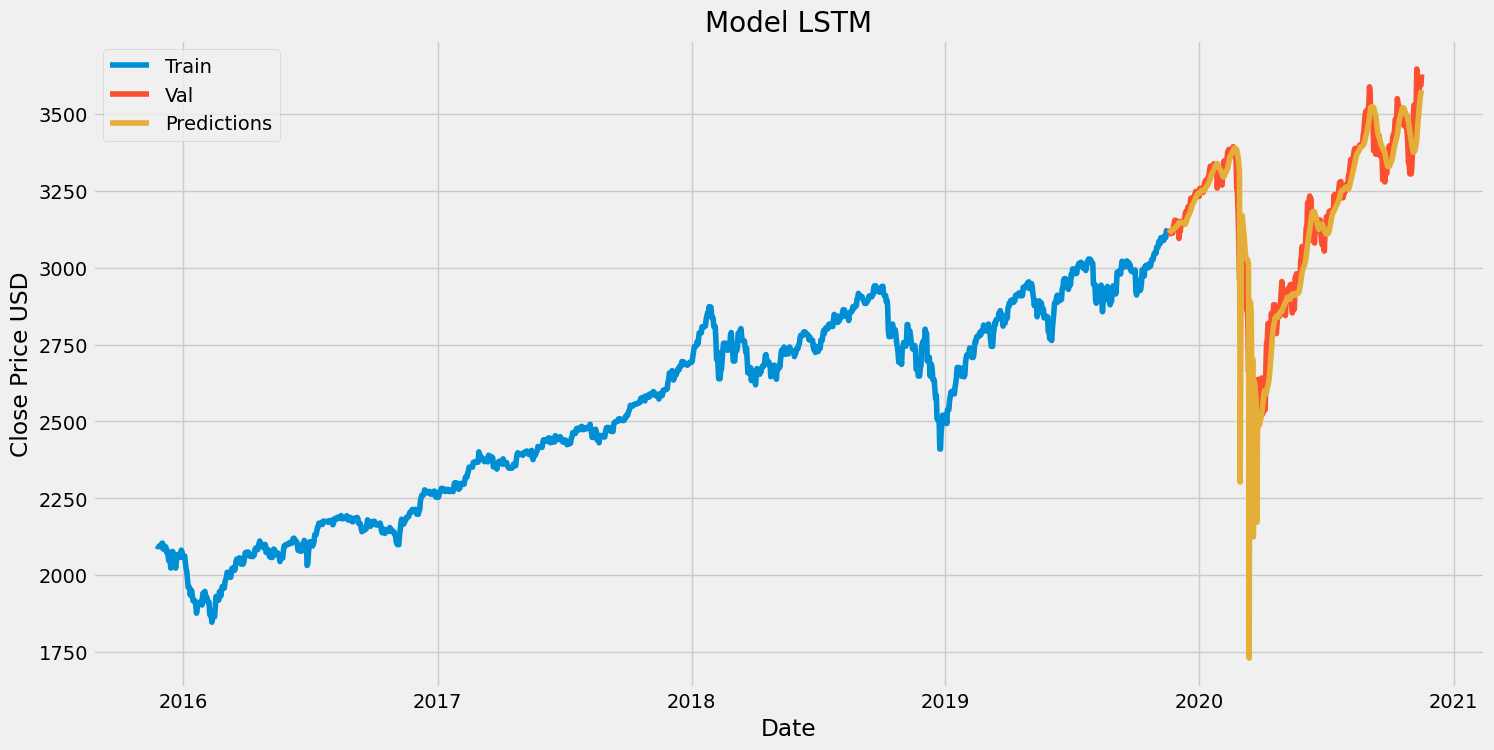

In [44]:
train = new_df[:train_len]
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

In [45]:
train_error=[]
val_error=[]

window_number=[5,8,10,15,20,30,40]
for i in window_number:
    #_____________________________________________________________________
    train_data = new_df[0:train_len]

    X_train=[]
    Y_train=[]

    for i in range(window, len(train_data)):
        X_train.append(train_data[i-window:i])
        Y_train.append(train_data[i])

    X_train, Y_train= np.array(X_train), np.array(Y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    #______________________________________________________________________
    test_data = new_df[train_len-window:]

    X_val=[]
    Y_val=[]
    for i in range(window, len(test_data)):
        X_val.append(test_data[i-window:i])
        Y_val.append(test_data[i])

    X_val, Y_val = np.array(X_val), np.array(Y_val)
    X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
    #______________________________________________________________________
    model=Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)
    #______________________________________________________________________
    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    train_error.append(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
    val_error.append(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))


12/12 [==============================] - 0s 3ms/step


In [46]:
train_error

[34.63677957298785,
 31.2787021094285,
 32.49879143630019,
 20.19478949624401,
 27.514098257702916,
 31.294619980664933,
 35.74676222919158]

In [47]:
val_error

[92.41817697569009,
 87.6246282150998,
 87.03377347823321,
 54.909621638443284,
 75.37445570915158,
 84.09382137975898,
 92.79110004818402]

In [48]:
pd.concat([pd.DataFrame(train_error,columns=['train_error']),
           pd.DataFrame(val_error,columns=['val_error']),
           pd.DataFrame([5,8,10,15,20,30,40],columns=['window'])], axis=1).set_index('window')

,train_error,val_error
window,,
5,34.636780,92.418177
8,31.278702,87.624628
10,32.498791,87.033773
15,20.194789,54.909622
20,27.514098,75.374456
30,31.294620,84.093821
40,35.746762,92.791100


In [49]:
window=10

train_data = new_df[0:train_len]
X_train=[]
Y_train=[]
for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

X_train, Y_train= np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#____________________________________________________________________
test_data = new_df[train_len-window:]
X_val=[]
Y_val=[]
for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])

X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [50]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False,activation='relu'))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))
opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=opt1)
model.summary()
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_16 (Dense)            (None, 100)               5100      
                                                                 
 dense_17 (Dense)            (None, 25)                2525      
                                                                 
 dense_18 (Dense)            (None, 1)                 26        
                                                                 
Total params: 38251 (149.42 KB)
Trainable params: 38251 (149.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

12/12 [==============================] - 0s 5ms/step
Train rmse: 47.83602254231455
Validation rmse: 100.87689240446262


In [55]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred

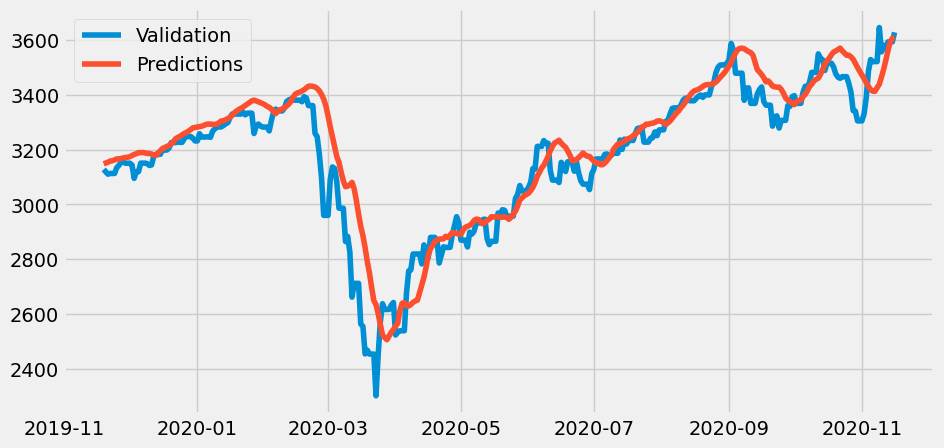

In [56]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [57]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(LSTM(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

12/12 [==============================] - 0s 7ms/step


In [58]:
r1, statistics.mean(r1), statistics.stdev(r1)

([32.37, 48.13, 34.96, 55.63, 17.45, 31.7, 24.62, 27.48, 43.52, 27.38],
 34.324,
 11.615050772357582)

In [59]:
r2, statistics.mean(r2), statistics.stdev(r2)

([82.87, 88.99, 97.59, 78.6, 46.92, 86.66, 67.51, 75.41, 80.67, 72.37],
 77.759,
 13.842688764189644)

Avg - 77.759

In [61]:
from keras.layers import SimpleRNN

In [62]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

12/12 [==============================] - 0s 5ms/step


In [63]:
r1, statistics.mean(r1), statistics.stdev(r1)

([18.92, 14.03, 18.91, 14.06, 14.03, 17.18, 15.86, 14.12, 14.25, 15.93],
 15.729,
 1.9944169295533196)

In [64]:
r2, statistics.mean(r2), statistics.stdev(r2)

([40.73, 36.97, 40.68, 37.21, 37.12, 39.78, 38.12, 37.37, 37.33, 38.44],
 38.375,
 1.4873783797152778)

Avg - 38.75

In [65]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,High,Predictions
Date,,
2019-11-19,3127.639893,3135.633301
2019-11-20,3118.969971,3137.183105
2019-11-21,3110.110107,3128.822754
2019-11-22,3112.870117,3119.618652
2019-11-23,3112.870117,3122.701172
...,...,...
2020-11-12,3569.020020,3589.796143
2020-11-13,3593.659912,3587.507080
2020-11-14,3593.659912,3596.877930


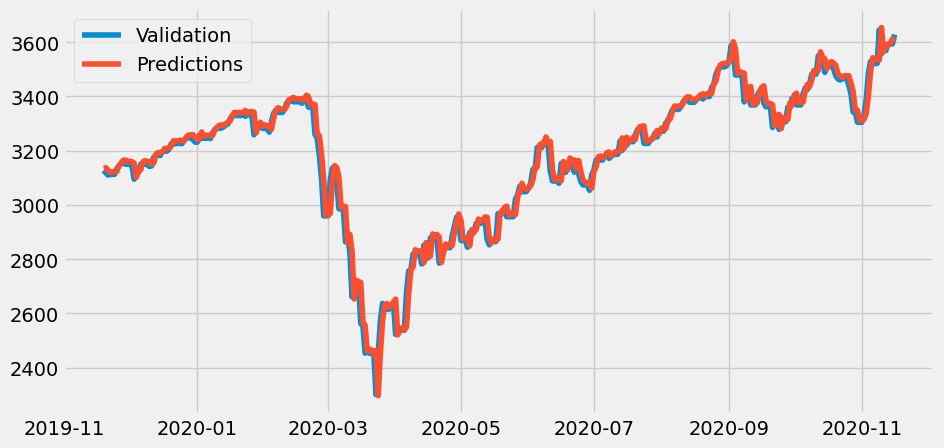

In [66]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [67]:
import tensorflow

r1=[]
r2=[]

model=Sequential()
model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))
lr_schedule = tensorflow.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 85))
opt1=Adam(learning_rate=1e-5,beta_1=0.9,beta_2=0.7)
model.compile(loss='mean_squared_error', optimizer=opt1)
history=model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=2, callbacks=[lr_schedule])

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
r_train_new=np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2)
r_val_new=np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2)

Epoch 1/100
145/145 - 3s - loss: 6799881.5000 - lr: 1.0000e-05 - 3s/epoch - 23ms/step
Epoch 2/100
145/145 - 1s - loss: 3664544.7500 - lr: 1.0275e-05 - 1s/epoch - 7ms/step
Epoch 3/100
145/145 - 1s - loss: 868148.2500 - lr: 1.0557e-05 - 1s/epoch - 8ms/step
Epoch 4/100
145/145 - 1s - loss: 11569.4521 - lr: 1.0847e-05 - 1s/epoch - 7ms/step
Epoch 5/100
145/145 - 1s - loss: 9233.8799 - lr: 1.1144e-05 - 1s/epoch - 8ms/step
Epoch 6/100
145/145 - 1s - loss: 9679.9238 - lr: 1.1450e-05 - 992ms/epoch - 7ms/step
Epoch 7/100
145/145 - 2s - loss: 8604.0908 - lr: 1.1765e-05 - 2s/epoch - 16ms/step
Epoch 8/100
145/145 - 2s - loss: 8239.1924 - lr: 1.2088e-05 - 2s/epoch - 14ms/step
Epoch 9/100
145/145 - 1s - loss: 7968.6870 - lr: 1.2420e-05 - 1s/epoch - 9ms/step
Epoch 10/100
145/145 - 1s - loss: 8892.5635 - lr: 1.2761e-05 - 1s/epoch - 8ms/step
Epoch 11/100
145/145 - 2s - loss: 7020.3398 - lr: 1.3111e-05 - 2s/epoch - 16ms/step
Epoch 12/100
145/145 - 2s - loss: 7500.0962 - lr: 1.3471e-05 - 2s/epoch - 12ms/s

(1e-05, 0.0005, 0.0, 1000.0)

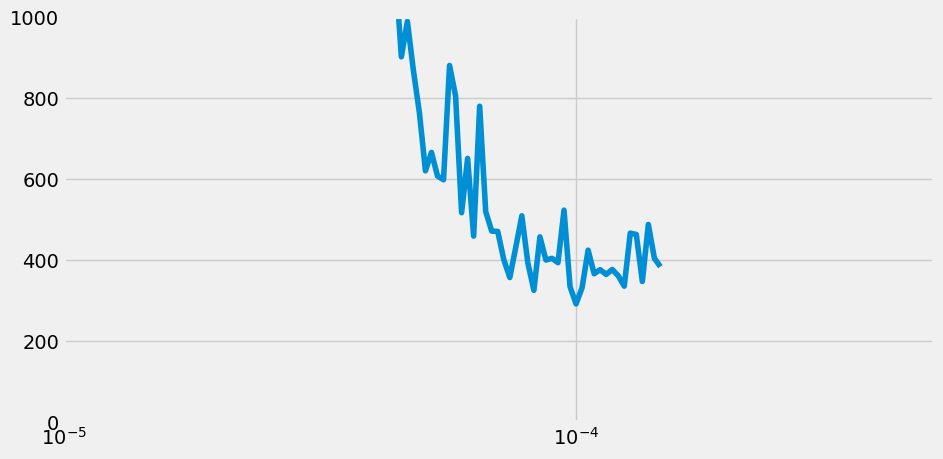

In [68]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-5, 5e-4, 0, 1000])

In [70]:
print(Y_train)

[2085.         2093.84008789 2093.84008789 ... 3120.45996094 3120.45996094
 3124.16992188]


In [69]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=Adam(learning_rate=1e-4,beta_1=0.9,beta_2=0.7)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

12/12 [==============================] - 0s 4ms/step


ValueError: ignored

In [ ]:
r1, statistics.mean(r1), statistics.stdev(r1)

In [ ]:
r2, statistics.mean(r2), statistics.stdev(r2)

In [71]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,High,Predictions
Date,,
2019-11-19,3127.639893,NaN
2019-11-20,3118.969971,NaN
2019-11-21,3110.110107,NaN
2019-11-22,3112.870117,NaN
2019-11-23,3112.870117,NaN
...,...,...
2020-11-12,3569.020020,NaN
2020-11-13,3593.659912,NaN
2020-11-14,3593.659912,NaN


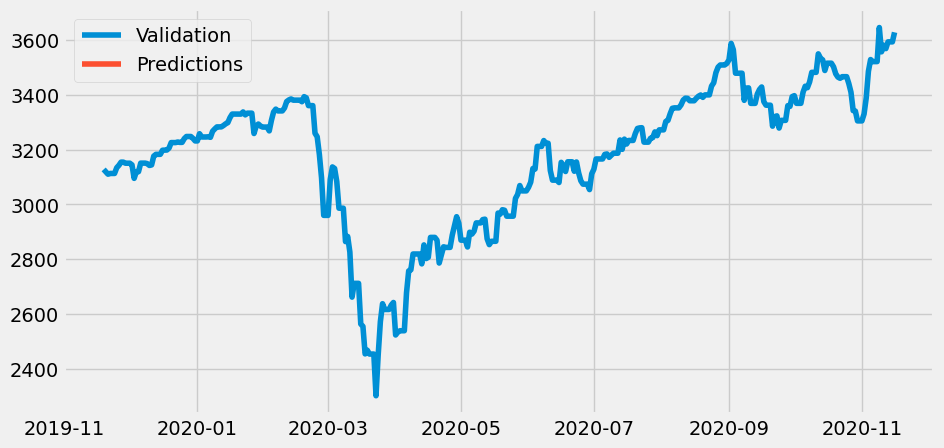

In [72]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [73]:
last_10_days=new_df[-10:].values
X_test=[]
X_test.append(last_10_days)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
print(pred_price)

1/1 [==============================] - 0s 26ms/step
[[nan]]


In [ ]:
df['High'].iloc[-4]

In [ ]:
df['High'].iloc[-4]-pred_price

In [ ]:
df.High.tail(14)

In [ ]:
last_9_days=new_df[-9:].values
X_test=[]
X_test=np.append(last_9_days,pred_price)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price2=model.predict(X_test)
print(pred_price2)

In [ ]:
df['High'].iloc[-3]

In [ ]:
df['High'].iloc[-3]-pred_price2

In [ ]:
last_8_days=new_df[-8:].values
X_test=[]
X_test=np.append(last_8_days,pred_price)
X_test=np.append(X_test,pred_price2)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price3=model.predict(X_test)
print(pred_price3)

In [ ]:
df['High'].iloc[-2]

In [ ]:
df['High'].iloc[-2]-pred_price3

In [ ]:
last_7_days=new_df[-7:].values
X_test=[]
X_test=np.append(last_7_days, pred_price)
X_test=np.append(X_test, pred_price2)
X_test=np.append(X_test, pred_price3)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price4=model.predict(X_test)
print(pred_price4)

In [ ]:
df.High.iloc[-4], df.High.iloc[-3], df.High.iloc[-2], df.High.iloc[-1]

In [ ]:
pred_price, pred_price2, pred_price3, pred_price4

In [ ]:
actual_prices=np.array([df.High.iloc[-4], df.High.iloc[-3], df.High.iloc[-2], df.High.iloc[-1]])
pred_prices=np.array([float(pred_price),float(pred_price2),float(pred_price3),float(pred_price4)])

In [ ]:
actual_prices, pred_prices

In [ ]:
data={'Actual values':[df.High.iloc[-4],df.High.iloc[-3],df.High.iloc[-2],df.High.iloc[-1]],
      'Predicted values':[float(pred_price),float(pred_price2),float(pred_price3),float(pred_price4)]}

pd.DataFrame(data, index=['2020-11-17','2020-11-18','2020-11-19','2020-11-20'])

In [ ]:
fut=pd.DataFrame(data, index=['2020-11-17','2020-11-18','2020-11-19','2020-11-20']).plot()
fut.set(ylim=(3540,3700))